# Will it rain in Australia tomorrow?

We use the 'Rain in Australia' Kaggle dataset. The datasets contains daily weather observations from Australian weather stations. We train several binary classification models to predict whether or not it will rain the following day. We study accuracy to determine which model performs better. 
For more information see:  
https://www.kaggle.com/jsphyg/weather-dataset-rattle-package/data

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

## Load dataset and perform initial checks

In [2]:
df = pd.read_csv('./weatherAUS.csv')

Check dimensions of dataset

In [3]:
df.shape

(142193, 24)

Check head of dataset

In [4]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


Check info to see column names, their type, and whether we have missing values

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
Date             142193 non-null object
Location         142193 non-null object
MinTemp          141556 non-null float64
MaxTemp          141871 non-null float64
Rainfall         140787 non-null float64
Evaporation      81350 non-null float64
Sunshine         74377 non-null float64
WindGustDir      132863 non-null object
WindGustSpeed    132923 non-null float64
WindDir9am       132180 non-null object
WindDir3pm       138415 non-null object
WindSpeed9am     140845 non-null float64
WindSpeed3pm     139563 non-null float64
Humidity9am      140419 non-null float64
Humidity3pm      138583 non-null float64
Pressure9am      128179 non-null float64
Pressure3pm      128212 non-null float64
Cloud9am         88536 non-null float64
Cloud3pm         85099 non-null float64
Temp9am          141289 non-null float64
Temp3pm          139467 non-null float64
RainToday        140787 non-null obje

In [6]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


## Exploratory Data Analysis

Heatmap of the correlation between the numerical features

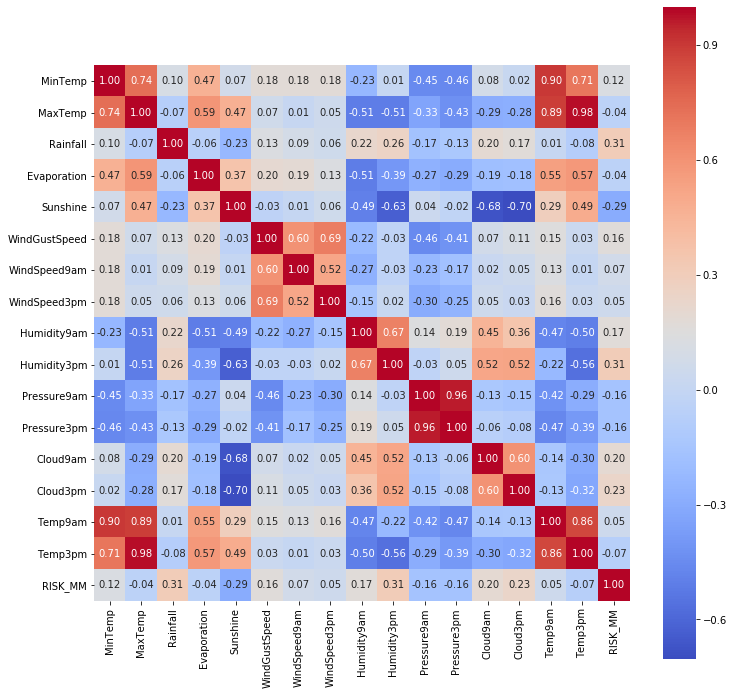

In [7]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), square=True, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

We observe very obvious strong correlations such as  
- MinTemp and MaxTemp with Temp9am and Temp3pm (and all within each other)
- Pressure9am with Pressure3pm  

and a quite strong anti-correlation between Cloud9am and Cloud3pm with Sunshine.

Pairplot of some numerical features to check their distribution and some correlations graphically (takes a bit of time to show since the dataset is quite large).

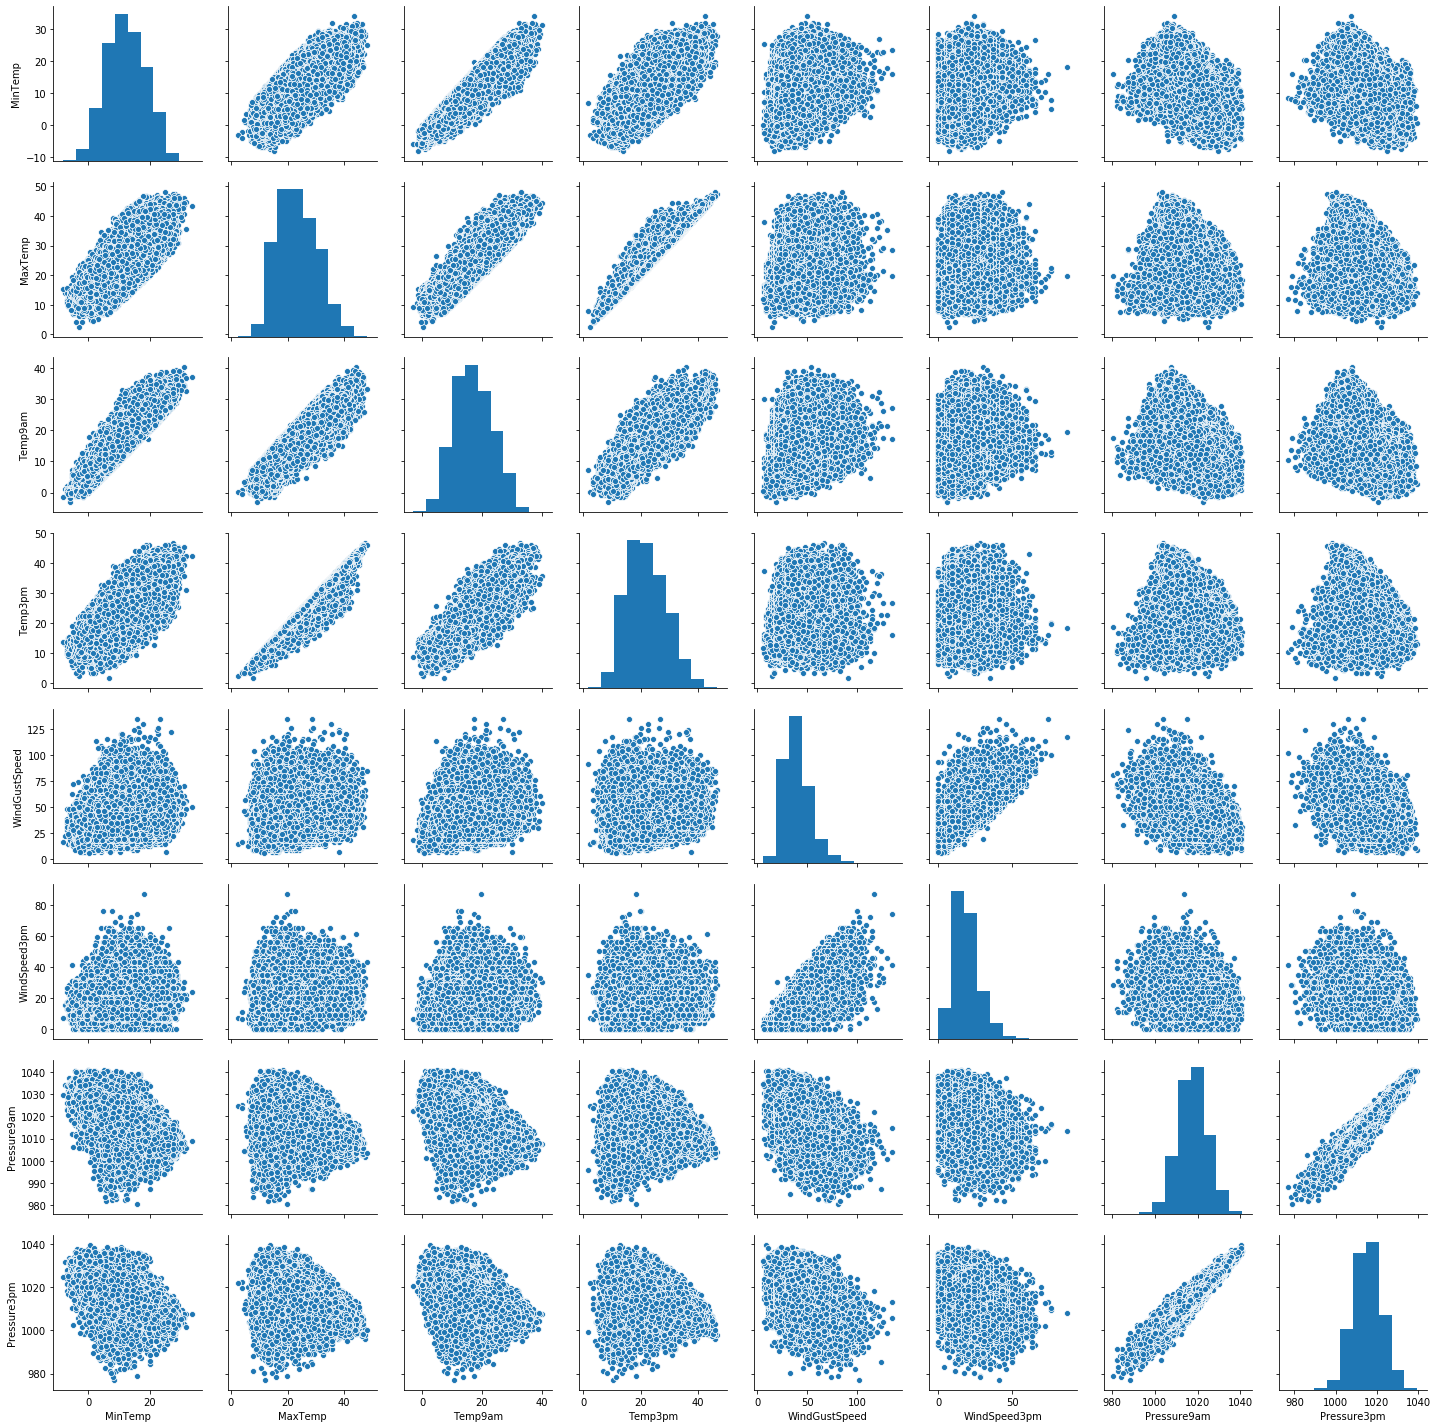

In [8]:
sns.pairplot(df[['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm', 'WindGustSpeed', 'WindSpeed3pm', 'Pressure9am', 'Pressure3pm']].dropna(),kind='scatter',palette='Rainbow')
plt.show()

Finally, check whether target ('RainTomorrow' column) is balanced or not

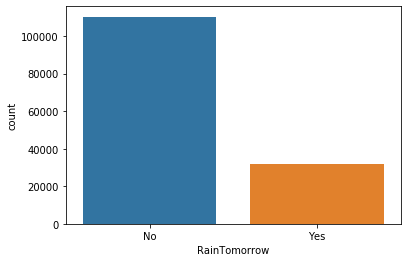

In [9]:
sns.countplot(x='RainTomorrow', data=df)
plt.show()

In [10]:
df['RainTomorrow'].value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

In [11]:
df['RainTomorrow'].value_counts()/len(df)

No     0.775819
Yes    0.224181
Name: RainTomorrow, dtype: float64

We observe that the target is highly unbalanced (78% No vs 22% Yes).

## Pre-processing

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
Date             142193 non-null object
Location         142193 non-null object
MinTemp          141556 non-null float64
MaxTemp          141871 non-null float64
Rainfall         140787 non-null float64
Evaporation      81350 non-null float64
Sunshine         74377 non-null float64
WindGustDir      132863 non-null object
WindGustSpeed    132923 non-null float64
WindDir9am       132180 non-null object
WindDir3pm       138415 non-null object
WindSpeed9am     140845 non-null float64
WindSpeed3pm     139563 non-null float64
Humidity9am      140419 non-null float64
Humidity3pm      138583 non-null float64
Pressure9am      128179 non-null float64
Pressure3pm      128212 non-null float64
Cloud9am         88536 non-null float64
Cloud3pm         85099 non-null float64
Temp9am          141289 non-null float64
Temp3pm          139467 non-null float64
RainToday        140787 non-null obje

We observe that we have missing values for most columns. This is how we are going to deal with each of them:  
1. We drop the Date column since we are not interested in it
2. We initially drop the Location column
3. We fill in the missing MinTemp, MaxTemp, Rainfall, WindGustSpeed, WindSpeed9am, WindSpeed3pm, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Temp9am, Temp3pm values with the respective medians since there are only a few missing entries in those columns (and medians depend less on outliers than averages)
4. Evaporation, Sunshine, Cloud9am, Cloud3pm have a lot of missing values (~40%) so we drop these columns altogether
5. WindGustDir, WindDir9am, WindDir3pm, RainToday are categorical features. We fill in the missing values using mode imputation
7. As suggested on kaggle, we drop the RISK_MM column otherwise it will leak answers to the model during training
8. RainTomorrow is the target and there are no missing values.

In [13]:
df_preprocessed = df.copy()

Implementing 1., 2., 4., 6.

In [14]:
df_preprocessed.drop(['Date','Location','Evaporation','Sunshine','Cloud9am','Cloud3pm','RISK_MM'],axis=1,inplace=True)

Implementing 3. and 5.

In [15]:
fill_missing_values = {'MinTemp': df_preprocessed['MinTemp'].median(),
                       'MaxTemp': df_preprocessed['MaxTemp'].median(),
                       'Rainfall': df_preprocessed['Rainfall'].median(),
                       'WindGustSpeed': df_preprocessed['WindGustSpeed'].median(),
                       'WindSpeed9am': df_preprocessed['WindSpeed9am'].median(),
                       'WindSpeed3pm': df_preprocessed['WindSpeed3pm'].median(),
                       'Humidity9am': df_preprocessed['Humidity9am'].median(),
                       'Humidity3pm': df_preprocessed['Humidity3pm'].median(),
                       'Pressure9am': df_preprocessed['Pressure9am'].median(),
                       'Pressure3pm': df_preprocessed['Pressure3pm'].median(),
                       'Temp9am': df_preprocessed['Temp9am'].median(),
                       'Temp3pm': df_preprocessed['Temp3pm'].median(),
                       'WindGustDir': df_preprocessed['WindGustDir'].mode()[0],
                       'WindDir9am': df_preprocessed['WindDir9am'].mode()[0],
                       'WindDir3pm': df_preprocessed['WindDir3pm'].mode()[0],
                       'RainToday': df_preprocessed['RainToday'].mode()[0]}

df_preprocessed.fillna(fill_missing_values,inplace=True)

Checking final shape of df

In [16]:
df_preprocessed.shape

(142193, 17)

*The code in the following section balances the dataset on the target column so that we have the same number of occurrences of Yes and No classes. Doing this however shrinks the size of the dataset by approximately 45% and ultimately results in a considerable decrease in accuracy for all the classification models considered below (on the other hand, as expected the 1-class recall value increases significantly for all models). Since we are interested in maximizing the accuracy, we decide not to balance the dataset and therefore to work with the original, larger, unbalanced dataset. We comment out this part of the code (which can be uncommented and run if considered useful).*

### Balance dataset

In [17]:
#df_preprocessed['RainTomorrow'].value_counts()

In [18]:
#df_preprocessed_balanced = df_preprocessed.groupby('RainTomorrow')
#df_preprocessed_balanced = df_preprocessed_balanced.apply(lambda x: x.sample(df_preprocessed_balanced.size().min()).reset_index(drop=True))
#df_preprocessed_balanced = df_preprocessed_balanced.reset_index(level=0, drop=True)

In [19]:
#df_preprocessed_balanced['RainTomorrow'].value_counts()

In [20]:
#df_preprocessed = df_preprocessed_balanced.copy()

In [21]:
#df_preprocessed.shape

### Feature selection

In [22]:
inputs = df_preprocessed.drop(['RainTomorrow'],axis=1)

In [23]:
target = df_preprocessed['RainTomorrow']

### Standardize numerical features

In [24]:
scaled_inputs = inputs.copy()
num_features = scaled_inputs.drop(['WindGustDir','WindDir9am','WindDir3pm','RainToday'],axis=1)
num_features_col = num_features.columns.values

scaler = StandardScaler()
scaler.fit(num_features.values)
num_features = scaler.transform(num_features.values)
scaled_inputs[num_features_col] = num_features

In [25]:
scaled_inputs.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday
0,0.190085,-0.045764,-0.204920,W,0.310479,W,WNW,0.678693,0.614071,0.113127,-1.436563,-1.474667,-1.220105,-0.013238,0.018050,No
1,-0.749042,0.263677,-0.276125,WNW,0.310479,NNW,WSW,-1.128893,0.384757,-1.312997,-1.290451,-1.044798,-1.115343,0.033114,0.381886,No
2,0.111824,0.348070,-0.276125,WSW,0.462679,W,WSW,0.565719,0.843386,-1.629913,-1.046931,-1.489490,-0.980648,0.620242,0.221798,No
3,-0.467304,0.671577,-0.276125,NE,-1.211523,SE,E,-0.338074,-1.105785,-1.260177,-1.728788,-0.007183,-0.367040,0.172171,0.702062,No
4,0.831821,1.276393,-0.157450,W,0.082179,ENE,NW,-0.789970,0.155443,0.694140,-0.900818,-1.015152,-1.384732,0.125818,1.167773,No


### Create dummy variables for categorial features and target

Check what possible values the categorical features can have

In [26]:
print('RainToday = ',scaled_inputs['RainToday'].unique())
print('RainTomorrow = ',target.unique())
print('WindGustDir = ',scaled_inputs['WindGustDir'].unique())
print('WindDir9am = ',scaled_inputs['WindDir9am'].unique())
print('WindDir3pm = ',scaled_inputs['WindDir3pm'].unique())

RainToday =  ['No' 'Yes']
RainTomorrow =  ['No' 'Yes']
WindGustDir =  ['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' 'ENE' 'SSE' 'S' 'NW' 'SE' 'ESE'
 'E' 'SSW']
WindDir9am =  ['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' 'N' 'SSW' 'WSW' 'ESE' 'E' 'NW'
 'WNW' 'NNE']
WindDir3pm =  ['WNW' 'WSW' 'E' 'NW' 'W' 'SSE' 'ESE' 'ENE' 'NNW' 'SSW' 'SW' 'SE' 'N' 'S'
 'NNE' 'NE']


Map Yes and No in RainToday and RainTomorrow to 1 and 0

In [27]:
scaled_inputs['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
target.replace({'No': 0, 'Yes': 1},inplace = True)

Create dummy variables for the other three features and drop first

In [28]:
scaled_inputs = pd.get_dummies(scaled_inputs,columns=['WindGustDir','WindDir9am','WindDir3pm'],drop_first=True)

In [29]:
scaled_inputs.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,0.190085,-0.045764,-0.204920,0.310479,0.678693,0.614071,0.113127,-1.436563,-1.474667,-1.220105,...,0,0,0,0,0,0,0,0,1,0
1,-0.749042,0.263677,-0.276125,0.310479,-1.128893,0.384757,-1.312997,-1.290451,-1.044798,-1.115343,...,0,0,0,0,0,0,0,0,0,1
2,0.111824,0.348070,-0.276125,0.462679,0.565719,0.843386,-1.629913,-1.046931,-1.489490,-0.980648,...,0,0,0,0,0,0,0,0,0,1
3,-0.467304,0.671577,-0.276125,-1.211523,-0.338074,-1.105785,-1.260177,-1.728788,-0.007183,-0.367040,...,0,0,0,0,0,0,0,0,0,0
4,0.831821,1.276393,-0.157450,0.082179,-0.789970,0.155443,0.694140,-0.900818,-1.015152,-1.384732,...,0,1,0,0,0,0,0,0,0,0


### Possible improvements:  
1. We could use SelectKBest to select the top k features (according to a specified score) to use in our classification models. However, since we standardized the numerical features, in models such as logistic regression the unimportant features will naturally be assigned very small weights so their contribution will not be significant anyway. This means that no substantial improvement in the accuracy of our model is expected by using SelectKBest or backward feature elimination.  
2. We could drop all the missing values in the numerical and categorial columns instead of doing median and mode imputations.
3. We could include the Location as a dummy variable and/or perform additional feature engineering
4. We could check for outliers in the numerical features and remove them.

## Logistic regression

### Train-test split

In [30]:
x_train, x_test, y_train, y_test = train_test_split(scaled_inputs, target, test_size = 0.2, random_state = 20)

### Training the model

In [31]:
reg = LogisticRegression(solver='lbfgs')
reg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Prediction of the model on train set

In [32]:
y_train_reg_pred = reg.predict(x_train)

Accuracy on train set

In [33]:
reg.score(x_train,y_train)

0.8406209891520299

Confusion matrix on train set

In [34]:
confusion_matrix(y_train, y_train_reg_pred)

array([[83611,  4740],
       [13390, 12013]])

### Finding coefficients and intercept

In [35]:
reg.intercept_

array([-2.20352957])

In [36]:
reg.coef_

array([[ 2.63546843e-01, -3.34426505e-01,  8.14484593e-02,
         6.64446736e-01, -4.60603524e-02, -2.29357637e-01,
         7.70305064e-02,  1.21930718e+00,  7.49288438e-01,
        -1.11664440e+00,  6.79008716e-02,  5.22101036e-02,
         5.46164060e-01, -6.85297331e-02,  1.23946171e-01,
         7.96661433e-02, -1.93100688e-01, -1.40644194e-01,
         4.14897822e-02, -1.13048300e-02,  2.06691680e-02,
         1.33433940e-01,  1.12718130e-01,  3.55311992e-02,
         1.28152664e-01,  5.42523142e-02,  7.42319193e-02,
         6.25592898e-02,  3.01316935e-01, -1.40448413e-01,
         2.54068823e-01,  3.65852710e-01,  5.46075689e-01,
         1.07346939e-01,  1.00886556e-01, -1.21639069e-01,
        -7.62453970e-02, -1.54446487e-01, -9.39261376e-04,
         1.19645532e-01,  4.96561807e-02,  1.34651905e-01,
         7.20813653e-02, -1.92986019e-02, -5.95259478e-03,
         3.31952336e-01, -2.22098507e-01,  1.73152175e-01,
         4.97487638e-01,  4.91751766e-01,  1.55506819e-0

In [37]:
summary_table = pd.DataFrame(columns=['Feature'], data = scaled_inputs.columns.values)
summary_table['Coefficient'] = np.transpose(reg.coef_)

### Interpreting the coefficients

In [38]:
summary_table['Odds Ratio'] = np.exp(summary_table.Coefficient)
summary_table.sort_values('Odds Ratio', ascending=False)

,Feature,Coefficient,Odds Ratio
7,Humidity3pm,1.219307,3.384842
8,Pressure9am,0.749288,2.115494
3,WindGustSpeed,0.664447,1.943415
12,RainToday,0.546164,1.726617
32,WindDir9am_NNE,0.546076,1.726465
48,WindDir3pm_NNW,0.497488,1.644584
49,WindDir3pm_NW,0.491752,1.635178
31,WindDir9am_NE,0.365853,1.441743
45,WindDir3pm_N,0.331952,1.393686
56,WindDir3pm_WNW,0.315180,1.370506


Comment on interpretation of coefficients

### Testing the model

Accuracy on test set

In [39]:
reg.score(x_test,y_test)

0.8373712155842329

In [40]:
y_test_reg_pred = reg.predict(x_test)
cm_reg = confusion_matrix(y_test, y_test_reg_pred)
tn_reg, fp_reg, fn_reg, tp_reg = cm_reg.ravel()
cm_reg

array([[20769,  1196],
       [ 3429,  3045]])

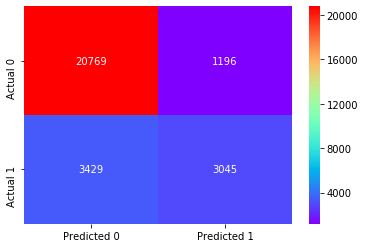

In [41]:
cm_reg_pd = pd.DataFrame(data=cm_reg,columns=['Predicted 0','Predicted 1'],index=['Actual 0', 'Actual 1'])
sns.heatmap(cm_reg_pd, annot=True, fmt='d', cmap='rainbow')
plt.show()

In [42]:
print(classification_report(y_test, y_test_reg_pred))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     21965
           1       0.72      0.47      0.57      6474

    accuracy                           0.84     28439
   macro avg       0.79      0.71      0.73     28439
weighted avg       0.83      0.84      0.82     28439



We observe low recall for class 1, which means that the model has a hard time predicting the correct class of observations that belong to class 1. In our 'Rain in Australia' scenario, this means that the model does an outstanding job at predicting when it will not rain the next day (high recall 0), but not a very good job at predicting when it will indeed rain. As explained in the "Balance dataset" section above, this is due to the fact that our dataset is highly unbalanced towards 0-class observations.

For completeness, the definitions are:  
- Precision 0: tn/(tn+fn)  
- Precision 1: tp/(tp+fp)
- Recall 0: tn/(tn+fp)
- Recall 1: tp/(tp+fn)
- f1-score: harmonic mean of precision and recall (inverse mean of inverses)
- support: actual # of occurrences in the dataset
- accuracy: (tp+tn)/(tp+tn+fp+fn)
- macro avg: mean of 0-class and 1-class values
- weighed avg: mean weighted on support value for each class

Predicted probabilities on test set

In [43]:
predicted_proba = reg.predict_proba(x_test)
predicted_proba

array([[0.9633221 , 0.0366779 ],
       [0.94608421, 0.05391579],
       [0.47703284, 0.52296716],
       ...,
       [0.90063507, 0.09936493],
       [0.77950925, 0.22049075],
       [0.96798853, 0.03201147]])

## Random Forest Classifier

### Training the model

In [44]:
rf = RandomForestClassifier(n_estimators = 128, max_depth = 8, random_state = 20)
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=8, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=128,
                       n_jobs=None, oob_score=False, random_state=20, verbose=0,
                       warm_start=False)

In [45]:
y_train_rf_pred = rf.predict(x_train)

In [46]:
rf.score(x_train,y_train)

0.8430648592576965

In [47]:
confusion_matrix(y_train, y_train_rf_pred)

array([[86118,  2233],
       [15619,  9784]])

### Testing the model

In [48]:
rf.score(x_test,y_test)

0.8354372516614508

In [49]:
y_test_rf_pred = rf.predict(x_test)
confusion_matrix(y_test, y_test_rf_pred)

array([[21359,   606],
       [ 4074,  2400]])

In [50]:
print(classification_report(y_test, y_test_rf_pred))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90     21965
           1       0.80      0.37      0.51      6474

    accuracy                           0.84     28439
   macro avg       0.82      0.67      0.70     28439
weighted avg       0.83      0.84      0.81     28439



## Decision Tree Classifier

### Training the model

In [51]:
dt = DecisionTreeClassifier(random_state = 20)
dt.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=20, splitter='best')

In [52]:
y_train_dt_pred = dt.predict(x_train)

In [53]:
dt.score(x_train,y_train)

0.9999296728027146

In [54]:
confusion_matrix(y_train, y_train_dt_pred)

array([[88351,     0],
       [    8, 25395]])

### Testing the model

In [55]:
dt.score(x_test,y_test)

0.7804071873131967

In [56]:
y_test_dt_pred = dt.predict(x_test)
confusion_matrix(y_test, y_test_dt_pred)

array([[18804,  3161],
       [ 3084,  3390]])

In [57]:
print(classification_report(y_test, y_test_dt_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86     21965
           1       0.52      0.52      0.52      6474

    accuracy                           0.78     28439
   macro avg       0.69      0.69      0.69     28439
weighted avg       0.78      0.78      0.78     28439



We show this example of Decision Tree to illustrate the classic behavior due to overfitting. By not specifying any hyperparameters in the DecisionTreeClassifier, the classifier reaches 100% accuracy on the train set but performs very poorly on the test set (the accuracy on the test set is comparable to the null accuracy - see next section). By specifying appropriate values for the DT parameters we could avoid this and we would obtain sensible predictions.

## Neural Network using TensorFlow 2

We know that the target is highly unbalanced (77.6% No vs 22.4% Yes) so the null accuracy is 77.6% (accuracy for a model that predicts only the most frequent class).

### Further split train set into train and validation sets. Overall split: 64 (train) - 16 (val) - 20 (test)

In [58]:
x_train_nn, x_val_nn, y_train_nn, y_val_nn = train_test_split(x_train, y_train, test_size=0.2)

Convert dataframes into numpy arrays for tensorflow

In [59]:
# train
train_inputs, train_target = x_train_nn.values, y_train_nn.values
# validation
validation_inputs, validation_target = x_val_nn.values, y_val_nn.values
# test
test_inputs, test_target = x_test.values, y_test.values

### Define and train neural network
Outline of the network:  
1. Two hidden layers with 256 nodes each. We choose relu for the 1st and 2nd layers and softmax for the output layer to obtain probabilities for the two classes
2. We choose adam as the optimizer  
3. We choose sparse_categorical_crossentropy as the loss function since this is a classification problem
4. We choose accuracy as the metric to measure the performance of the NN
5. We use a validation set with early stopping (with patience=2) to prevent overfitting of the train set  
6. Finally, we fix the batch size to be 100 and the max number of epochs to be 100

In [60]:
input_size = len(x_train_nn.columns)
output_size = 2

hidden_layer_size = 256

model = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'), # 1st hidden layer
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'), # 2nd hidden layer
    tf.keras.layers.Dense(output_size, activation='softmax') # output layer
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

batch_size = 100
max_epochs = 100

early_stopping = tf.keras.callbacks.EarlyStopping(patience=2)

model.fit(train_inputs,
          train_target,
          batch_size=batch_size,
          epochs=max_epochs,
          callbacks=[early_stopping],
          validation_data=(validation_inputs, validation_target),
          verbose = 2
          )  

Train on 91003 samples, validate on 22751 samples
Epoch 1/100
91003/91003 - 7s - loss: 0.3655 - accuracy: 0.8428 - val_loss: 0.3539 - val_accuracy: 0.8454
Epoch 2/100
91003/91003 - 6s - loss: 0.3486 - accuracy: 0.8498 - val_loss: 0.3511 - val_accuracy: 0.8473
Epoch 3/100
91003/91003 - 7s - loss: 0.3423 - accuracy: 0.8524 - val_loss: 0.3496 - val_accuracy: 0.8472
Epoch 4/100
91003/91003 - 7s - loss: 0.3364 - accuracy: 0.8547 - val_loss: 0.3480 - val_accuracy: 0.8483
Epoch 5/100
91003/91003 - 6s - loss: 0.3315 - accuracy: 0.8568 - val_loss: 0.3496 - val_accuracy: 0.8484
Epoch 6/100
91003/91003 - 6s - loss: 0.3267 - accuracy: 0.8591 - val_loss: 0.3481 - val_accuracy: 0.8485


### Testing the model

In [61]:
y_test_nn_pred_proba = model.predict(test_inputs)
y_test_nn_pred = model.predict_classes(test_inputs)

In [62]:
cm_nn = confusion_matrix(test_target, y_test_nn_pred)
tn_nn, fp_nn, fn_nn, tp_nn = cm_nn.ravel()
cm_nn

array([[20447,  1518],
       [ 2741,  3733]])

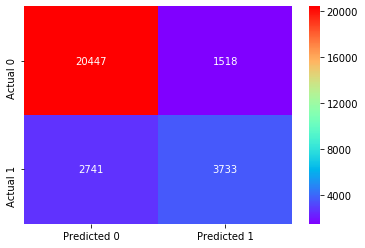

In [63]:
cm_nn_pd = pd.DataFrame(data=cm_nn,columns=['Predicted 0','Predicted 1'],index=['Actual 0', 'Actual 1'])
sns.heatmap(cm_nn_pd, annot=True, fmt='d', cmap='rainbow')
plt.show()

In [64]:
print(classification_report(test_target, y_test_nn_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91     21965
           1       0.71      0.58      0.64      6474

    accuracy                           0.85     28439
   macro avg       0.80      0.75      0.77     28439
weighted avg       0.84      0.85      0.84     28439



We observe that the 1-class recall for the NN is much higher than the one found before for the logistic regression.